In [ ]:
!pip install PyDrive

In [1]:
import os
import mykeys

project_name = 'CH17_LangGraph_SUB01'

os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_ENDPOINT"] = "https://api.smith.langchain.com"
os.environ["LANGCHAIN_PROJECT"] = project_name
os.environ["LANGCHAIN_API_KEY"] = mykeys.get_key('LANG')
os.environ["LANGCHAIN_HUB_API_KEY"] = mykeys.get_key('LANG')
os.environ["OPENAI_API_KEY"] = mykeys.get_key('GPT')
os.environ["GOOGLE_API_KEY"] = mykeys.get_key('GOO')
os.environ["HUGGINGFACEHUB_API_TOKEN"] = mykeys.get_key('HF')
os.environ["UPSTAGE_API_KEY"] = mykeys.get_key('UP')
os.environ["COHERE_API_KEY"] = mykeys.get_key('COH')
os.environ["JINA_API_KEY"] = mykeys.get_key('JINA')
os.environ["ANTHROPIC_API_KEY"] = mykeys.get_key('ANT')
os.environ["DEEPL_API_KEY"] = mykeys.get_key('DEEP')
os.environ["TAVILY_API_KEY"] = mykeys.get_key('TAV')
os.environ["TOGETHER_API_KEY"] = mykeys.get_key('TOG')

아래 링크를 복사하여 웹 브라우저에 붙여넣으세요.
https://accounts.google.com/o/oauth2/auth?client_id=35726703810-4v13dfqmilhgv6shlc3cv9i3ktuh73j1.apps.googleusercontent.com&redirect_uri=http%3A%2F%2Flocalhost&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&access_type=offline&response_type=code
Authentication successful.


In [2]:
from langchain_teddynote import logging

# 프로젝트 이름을 입력합니다.
logging.langsmith(project_name)

LangSmith 추적을 시작합니다.
[프로젝트명]
CH17_LangGraph_SUB01


In [ ]:
from langchain_teddynote import logging

# set_enable=False 로 지정하면 추적을 하지 않습니다.
logging.langsmith(project_name, set_enable=False)

CH17 LangGraph

01. 핵심 기능

01. LangGraph 에 자주 등장하는 Python 문법이해

In [3]:
# TypedDict와 Dict의 차이점 예시
from typing import Dict, TypedDict

# 일반적인 파이썬 딕셔너리(dict) 사용
sample_dict: Dict[str, str] = {
    "name": "테디",
    "age": "30",  # 문자열로 저장 (dict 에서는 가능)
    "job": "개발자",
}


# TypedDict 사용
class Person(TypedDict):
    name: str
    age: int  # 정수형으로 명시
    job: str


typed_dict: Person = {"name": "셜리", "age": 25, "job": "디자이너"}

print("sample_dict=",sample_dict)
print("typed_dict=",typed_dict)

sample_dict= {'name': '테디', 'age': '30', 'job': '개발자'}
typed_dict= {'name': '셜리', 'age': 25, 'job': '디자이너'}


In [4]:
# dict의 경우
sample_dict["age"] = 35  # 문자열에서 정수로 변경되어도 오류 없음
sample_dict["new_field"] = "추가 정보"  # 새로운 필드 추가 가능

# TypedDict의 경우
typed_dict["age"] = 35  # 정수형으로 올바르게 사용
typed_dict["age"] = "35"  # 타입 체커가 오류를 감지함
typed_dict["new_field"] = (
    "추가 정보"  # 타입 체커가 정의되지 않은 키라고 오류를 발생시킴
)
print("sample_dict=",sample_dict)
print("typed_dict=",typed_dict)

sample_dict= {'name': '테디', 'age': 35, 'job': '개발자', 'new_field': '추가 정보'}
typed_dict= {'name': '셜리', 'age': '35', 'job': '디자이너', 'new_field': '추가 정보'}


In [5]:
from typing import Annotated

name: Annotated[str, "사용자 이름"]
age: Annotated[int, "사용자 나이 (0-150)"]


In [6]:
from typing import Annotated, List
from pydantic import Field, BaseModel, ValidationError


class Employee(BaseModel):
    id: Annotated[int, Field(..., description="직원 ID")]
    name: Annotated[str, Field(..., min_length=3, max_length=50, description="이름")]
    age: Annotated[int, Field(gt=18, lt=65, description="나이 (19-64세)")]
    salary: Annotated[
        float, Field(gt=0, lt=10000, description="연봉 (단위: 만원, 최대 10억)")
    ]
    skills: Annotated[
        List[str], Field(min_items=1, max_items=10, description="보유 기술 (1-10개)")
    ]


# 유효한 데이터로 인스턴스 생성
try:
    valid_employee = Employee(
        id=1, name="테디노트", age=30, salary=1000, skills=["Python", "LangChain"]
    )
    print("유효한 직원 데이터:", valid_employee)
except ValidationError as e:
    print("유효성 검사 오류:", e)

# 유효하지 않은 데이터로 인스턴스 생성 시도
try:
    invalid_employee = Employee(
        name="테디",  # 이름이 너무 짧음
        age=17,  # 나이가 범위를 벗어남
        salary=20000,  # 급여가 범위를 벗어남
        skills="Python",  # 리스트가 아님
    )
except ValidationError as e:
    print("유효성 검사 오류:")
    for error in e.errors():
        print(f"- {error['loc'][0]}: {error['msg']}")


유효한 직원 데이터: id=1 name='테디노트' age=30 salary=1000.0 skills=['Python', 'LangChain']
유효성 검사 오류:
- id: Field required
- name: String should have at least 3 characters
- age: Input should be greater than 18
- salary: Input should be less than 10000
- skills: Input should be a valid list


In [7]:
from langchain_core.messages import AIMessage, HumanMessage
from langgraph.graph import add_messages

# 기본 사용 예시
msgs1 = [HumanMessage(content="안녕하세요?", id="1")]
msgs2 = [AIMessage(content="반갑습니다~", id="2")]

result1 = add_messages(msgs1, msgs2)
print(result1)


[HumanMessage(content='안녕하세요?', additional_kwargs={}, response_metadata={}, id='1'), AIMessage(content='반갑습니다~', additional_kwargs={}, response_metadata={}, id='2')]


In [8]:
# 동일한 ID를 가진 메시지 대체 예시
msgs1 = [HumanMessage(content="안녕하세요?", id="1")]
msgs2 = [HumanMessage(content="반갑습니다~", id="1")]

result2 = add_messages(msgs1, msgs2)
print(result2)


[HumanMessage(content='반갑습니다~', additional_kwargs={}, response_metadata={}, id='1')]


02. LangGraph를 활용한 챗봇 구축

In [9]:
from typing import Annotated, TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages


class State(TypedDict):
    # 메시지 정의(list type 이며 add_messages 함수를 사용하여 메시지를 추가)
    messages: Annotated[list, add_messages]


In [10]:
from langchain_openai import ChatOpenAI

# LLM 정의
llm = ChatOpenAI(model="gpt-4.1", temperature=0)


# 챗봇 함수 정의
def chatbot(state: State):
    # 메시지 호출 및 반환
    return {"messages": [llm.invoke(state["messages"])]}


In [11]:
# 그래프 생성
graph_builder = StateGraph(State)

# 노드 이름, 함수 혹은 callable 객체를 인자로 받아 노드를 추가
graph_builder.add_node("chatbot", chatbot)


In [12]:
# 시작 노드에서 챗봇 노드로의 엣지 추가
graph_builder.add_edge(START, "chatbot")


In [13]:
# 그래프에 엣지 추가
graph_builder.add_edge("chatbot", END)


In [14]:
# 그래프 컴파일
graph = graph_builder.compile()


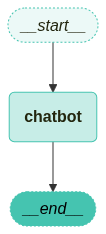

In [15]:
from langchain_teddynote.graphs import visualize_graph

# 그래프 시각화
visualize_graph(graph)


In [16]:
question = "서울의 유명한 맛집 TOP 10 추천해줘"

# 그래프 이벤트 스트리밍
for event in graph.stream({"messages": [("user", question)]}):
    # 이벤트 값 출력
    for value in event.values():
        print("Assistant:", value["messages"][-1].content)


Assistant: 서울에는 다양한 맛집이 많아 순위를 매기기 어렵지만, 많은 사람들에게 사랑받는 서울의 유명 맛집 TOP 10을 추천해드릴게요! (2024년 기준, 다양한 음식 종류를 반영했습니다.)

1. **진주회관** (중구)  
   - 대표 메뉴: 콩국수, 비빔밥  
   - 설명: 50년 전통의 콩국수 맛집. 진한 콩국물로 유명해요.

2. **을지면옥** (중구)  
   - 대표 메뉴: 평양냉면  
   - 설명: 평양냉면의 정석. 담백하고 깊은 맛으로 냉면 마니아들에게 인기.

3. **백리향** (강남구)  
   - 대표 메뉴: 북경오리, 딤섬  
   - 설명: 고급 중식당으로, 북경오리와 딤섬이 일품.

4. **광장시장 순희네 빈대떡** (종로구)  
   - 대표 메뉴: 빈대떡, 마약김밥  
   - 설명: 광장시장의 대표 먹거리. 바삭한 빈대떡이 유명.

5. **삼청동 수제비** (종로구)  
   - 대표 메뉴: 수제비, 감자전  
   - 설명: 쫄깃한 수제비와 고소한 감자전이 인기.

6. **마포진짜원조최대포** (마포구)  
   - 대표 메뉴: 돼지갈비, 삼겹살  
   - 설명: 70년 전통의 고깃집. 숯불에 구운 돼지갈비가 일품.

7. **노포식당** (용산구)  
   - 대표 메뉴: 한우곰탕  
   - 설명: 깊고 진한 국물의 곰탕으로 유명한 한우 전문점.

8. **이태원 더방갈로** (용산구)  
   - 대표 메뉴: 인도/네팔 커리, 난  
   - 설명: 이국적인 분위기에서 즐기는 정통 커리와 난.

9. **미진** (종로구)  
   - 대표 메뉴: 메밀국수, 소바  
   - 설명: 60년 전통의 메밀국수 전문점. 시원한 국물이 일품.

10. **옥동식** (마포구)  
    - 대표 메뉴: 돼지국밥  
    - 설명: 깔끔하고 담백한 돼지국밥으로 미식가들에게 인기.

---

이 외에도 서울에는 수많은 맛집이 있으니, 방문하시는 지역과 취향에 따라 다양한 곳을 찾아보시는 것도 추천드려요!

03. LangGraph를 활용한 Agent 구축

In [17]:
from langchain_teddynote.tools.tavily import TavilySearch

# 검색 도구 생성
tool = TavilySearch(max_results=3)

# 도구 목록에 추가
tools = [tool]

# 도구 실행
tool.invoke("테디노트 랭체인 튜토리얼")


[{'url': 'https://www.youtube.com/watch?v=mVu6Wj8Z7C0',
  'title': '랭체인 한국어 튜토리얼 업데이트 소식 처음 사용자를 위한 친절한 ...',
  'content': '#랭체인 한국어 튜토리얼🇰🇷 업데이트 소식🔥 처음 사용자를 위한 친절한 환경설치(Windows, Mac)\n\n테디노트 TeddyNote\n317 likes\n16451 views\n19 Jun 2024\n📝 환경설정(Windows)\nhttps://teddynote.com/10-RAG%EB%B9%84%EB%B2%95%EB%85%B8%ED%8A%B8/%ED%99%98%EA%B2%BD%20%EC%84%A4%EC%A0%95%20(Windows)/\n\n📝 환경설정(Mac)\nhttps://teddynote.com/10-RAG%EB%B9%84%EB%B2%95%EB%85%B8%ED%8A%B8/%ED%99%98%EA%B2%BD%20%EC%84%A4%EC%A0%95%20(Mac)/\n\n📍[패스트캠퍼스] "테디노트의 RAG 비법노트" 강의\n링크: https://bit.ly/4e1h8zO\n\n🤖 디스코드 채널\nhttps://discord.gg/q3RvQZ5CfK\n\n📘 랭체인 튜토리얼 무료 전자책(wikidocs)\nhttps://wikidocs.net/book/14314\n\n✅ 랭체인 한국어 튜토리얼 코드저장소(GitHub)\nhttps://github.com/teddylee777/langchain-kr\n\n✅ 줄거리\n00:00 랭체인 한국어 튜토리얼 공지사항\n01:59 langchain-teddynote 패키지\n08:25 감사인사\n09:15 Windows 환경설치\n21:48 Mac 환경설치\n\n#rag #langchain\n---\n📍 "테디노트의 RAG 비법노트" 랭체인 강의: https://fastcampus.co.kr/data_online_teddy\n📘 랭체인 한국어 튜토리얼(무료 전자책): https://wikidocs.

In [18]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph.message import add_messages


# State 정의
class State(TypedDict):
    # list 타입에 add_messages 적용(list 에 message 추가)
    messages: Annotated[list, add_messages]


In [19]:
from langchain_openai import ChatOpenAI

# LLM 초기화
llm = ChatOpenAI(model="gpt-4.1")
# LLM 에 도구 바인딩
llm_with_tools = llm.bind_tools(tools)


In [20]:
# 노드 함수 정의
def chatbot(state: State):
    answer = llm_with_tools.invoke(state["messages"])
    # 메시지 목록 반환
    return {"messages": [answer]}  # 자동으로 add_messages 적용


In [21]:
from langgraph.graph import StateGraph

# 상태 그래프 초기화
graph_builder = StateGraph(State)

# 노드 추가
graph_builder.add_node("chatbot", chatbot)


In [22]:
import json
from langchain_core.messages import ToolMessage


class BasicToolNode:
    """Run tools requested in the last AIMessage node"""

    def __init__(self, tools: list) -> None:
        # 도구 리스트
        self.tools_list = {tool.name: tool for tool in tools}

    def __call__(self, inputs: dict):
        # 메시지가 존재할 경우 가장 최근 메시지 1개 추출
        if messages := inputs.get("messages", []):
            message = messages[-1]
        else:
            raise ValueError("No message found in input")

        # 도구 호출 결과
        outputs = []
        for tool_call in message.tool_calls:
            # 도구 호출 후 결과 저장
            tool_result = self.tools_list[tool_call["name"]].invoke(tool_call["args"])
            outputs.append(
                # 도구 호출 결과를 메시지로 저장
                ToolMessage(
                    content=json.dumps(
                        tool_result, ensure_ascii=False
                    ),  # 도구 호출 결과를 문자열로 변환
                    name=tool_call["name"],
                    tool_call_id=tool_call["id"],
                )
            )

        return {"messages": outputs}


# 도구 노드 생성
tool_node = BasicToolNode(tools=[tool])

# 그래프에 도구 노드 추가
graph_builder.add_node("tools", tool_node)


In [23]:
from langgraph.graph import START, END


def route_tools(
    state: State,
):
    if messages := state.get("messages", []):
        # 가장 최근 AI 메시지 추출
        ai_message = messages[-1]
    else:
        # 입력 상태에 메시지가 없는 경우 예외 발생
        raise ValueError(f"No messages found in input state to tool_edge: {state}")

    # AI 메시지에 도구 호출이 있는 경우 "tools" 반환
    if hasattr(ai_message, "tool_calls") and len(ai_message.tool_calls) > 0:
        # 도구 호출이 있는 경우 "tools" 반환
        return "tools"
    # 도구 호출이 없는 경우 "END" 반환
    return END


# `tools_condition` 함수는 챗봇이 도구 사용을 요청하면 "tools"를 반환하고, 직접 응답이 가능한 경우 "END"를 반환
graph_builder.add_conditional_edges(
    source="chatbot",
    path=route_tools,
    # route_tools 의 반환값이 "tools" 인 경우 "tools" 노드로, 그렇지 않으면 END 노드로 라우팅
    path_map={"tools": "tools", END: END},
)

# tools > chatbot
graph_builder.add_edge("tools", "chatbot")

# START > chatbot
graph_builder.add_edge(START, "chatbot")

# 그래프 컴파일
graph = graph_builder.compile()


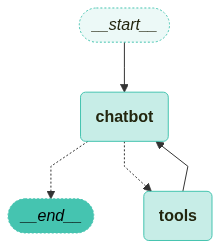

In [24]:
from langchain_teddynote.graphs import visualize_graph

# 그래프 시각화
visualize_graph(graph)


In [25]:
from langchain_teddynote.messages import display_message_tree

question = "테디노트 YouTube"

for event in graph.stream({"messages": [("user", question)]}):
    for key, value in event.items():
        print(f"\n==============\nSTEP: {key}\n==============\n")
        display_message_tree(value["messages"][-1])



STEP: chatbot

    content: ""
    additional_kwargs:
        tool_calls:
            index [0]
                id: "call_0gQV5SGuLl0UOOMbjJtrAiyb"
                function: {"arguments": "{"query":"테디노트 YouTube 채널 정보"}", "name": "tavily_web_search"}
                type: "function"
        refusal: None
    response_metadata:
        token_usage:
            completion_tokens: 25
            prompt_tokens: 97
            total_tokens: 122
            completion_tokens_details: {"accepted_prediction_tokens": 0, "audio_tokens": 0, "reasoning_tokens": 0, "rejected_prediction_tokens": 0}
            prompt_tokens_details: {"audio_tokens": 0, "cached_tokens": 0}
        model_name: "gpt-4.1-2025-04-14"
        system_fingerprint: "fp_daf5fcc80a"
        id: "chatcmpl-C8yZf3KFTk1phFWCeavCZb7sbvGL7"
        service_tier: "default"
        finish_reason: "tool_calls"
        logprobs: None
    type: "ai"
    name: None
    id: "run--1bf56e00-7947-4886-b0d4-c8a8e881e642-0"
    example: False


04. Agent 에 메모리(memory) 추가

In [26]:
from langgraph.checkpoint.memory import MemorySaver

# 메모리 저장소 생성
memory = MemorySaver()


In [127]:
from typing import Annotated
from typing_extensions import TypedDict
from langchain_openai import ChatOpenAI
from langchain_teddynote.tools.tavily import TavilySearch
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from langgraph.prebuilt import ToolNode, tools_condition


########## 1. 상태 정의 ##########
# 상태 정의
class State(TypedDict):
    # 메시지 목록 주석 추가
    messages: Annotated[list, add_messages]
    dummy_data: str


########## 2. 도구 정의 및 바인딩 ##########
# 도구 초기화
tool = TavilySearch(max_results=3)
tools = [tool]

# LLM 초기화
llm = ChatOpenAI(model="gpt-4.1")

# 도구와 LLM 결합
llm_with_tools = llm.bind_tools(tools)


########## 3. 노드 추가 ##########
# 챗봇 함수 정의
def chatbot(state: State):
    # 메시지 호출 및 반환
    return {"messages": [llm_with_tools.invoke(state["messages"])]}


# 상태 그래프 생성
graph_builder = StateGraph(State)

# 챗봇 노드 추가
graph_builder.add_node("chatbot", chatbot)

# 도구 노드 생성 및 추가
tool_node = ToolNode(tools=[tool])

# 도구 노드 추가
graph_builder.add_node("tools", tool_node)

# 조건부 엣지
graph_builder.add_conditional_edges(
    "chatbot",
    tools_condition,
)

########## 4. 엣지 추가 ##########

# tools > chatbot
graph_builder.add_edge("tools", "chatbot")

# START > chatbot
graph_builder.add_edge(START, "chatbot")

# chatbot > END
graph_builder.add_edge("chatbot", END)


In [128]:
# 그래프 빌더 컴파일
graph = graph_builder.compile(checkpointer=memory)


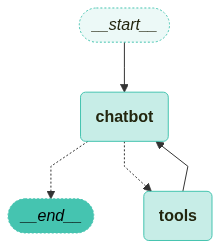

In [106]:
from langchain_teddynote.graphs import visualize_graph

# 그래프 시각화
visualize_graph(graph)


In [107]:
from langchain_core.runnables import RunnableConfig

config = RunnableConfig(
    recursion_limit=10,  # 최대 10개의 노드까지 방문. 그 이상은 RecursionError 발생
    configurable={"thread_id": "1"},  # 스레드 ID 설정
)


In [108]:
# 첫 질문
question = (
    "내 이름은 `Charlie` 입니다. 생성AI 4기 교육생입니다. 만나서 반가워요"
)

for event in graph.stream({"messages": [("user", question)]}, config=config):
    for value in event.values():
        value["messages"][-1].pretty_print()


================================== Ai Message ==================================

Charlie님, 만나서 반갑습니다!  
생성AI 4기 교육생이시군요. 앞으로 AI와 관련된 궁금한 점이나 도움이 필요하실 때 언제든 편하게 말씀해 주세요.  
함께 성장하는 시간 되었으면 좋겠습니다. 😊  
특별히 관심 있는 AI 분야나 배우고 싶은 내용이 있으신가요?


In [109]:
# 이어지는 질문
question = "내 이름이 뭐라고 했지?"

for event in graph.stream({"messages": [("user", question)]}, config=config):
    for value in event.values():
        value["messages"][-1].pretty_print()


================================== Ai Message ==================================

당신의 이름은 "Charlie"입니다!  
필요할 때 언제든 다시 불러드릴 수 있어요. 혹시 개인화된 정보로 도와드릴 부분이 있으면 말씀해 주세요. 😊


In [110]:
from langchain_core.runnables import RunnableConfig

question = "내 이름이 뭐라고 했지?"

config = RunnableConfig(
    recursion_limit=10,  # 최대 10개의 노드까지 방문. 그 이상은 RecursionError 발생
    configurable={"thread_id": "2"},  # 스레드 ID 설정
)

for event in graph.stream({"messages": [("user", question)]}, config=config):
    for value in event.values():
        value["messages"][-1].pretty_print()


================================== Ai Message ==================================

아직 당신의 이름을 듣지 못했어요. 이름을 알려주시면 기억할 수 있어요!


In [111]:
from langchain_core.runnables import RunnableConfig

config = RunnableConfig(
    configurable={"thread_id": "1"},  # 스레드 ID 설정
)
# 그래프 상태 스냅샷 생성
snapshot = graph.get_state(config)
snapshot.values["messages"]


[HumanMessage(content='AI 관련 최신 뉴스를 알려주세요.', additional_kwargs={}, response_metadata={}, id='6f821438-0e46-4649-b195-9928f516381e'),
 AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_7gLTs7Z1AL3vYzQszReMFH9D', 'function': {'arguments': '{"query":"AI 최신 뉴스"}', 'name': 'search_keyword'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 16, 'prompt_tokens': 51, 'total_tokens': 67, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-2025-04-14', 'system_fingerprint': 'fp_daf5fcc80a', 'id': 'chatcmpl-C8yvxrPD5SqmI67aPfG3Arr60SnJf', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--781d8504-9739-47cd-9ff2-a9c3ba57fc9c-0', tool_calls=[{'name': 'search_keyword', 'args': {'query': 'AI 최신 뉴스'}, 'id': 'call_7gLTs7Z1AL3vYz

In [112]:
# 설정된 config 정보
snapshot.config


{'configurable': {'thread_id': '1',
  'checkpoint_ns': '',
  'checkpoint_id': '1f082ffc-a9e6-6f1c-800e-f2c0529773f1'}}

In [113]:
# 저장된 값(values)
snapshot.values


{'messages': [HumanMessage(content='AI 관련 최신 뉴스를 알려주세요.', additional_kwargs={}, response_metadata={}, id='6f821438-0e46-4649-b195-9928f516381e'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_7gLTs7Z1AL3vYzQszReMFH9D', 'function': {'arguments': '{"query":"AI 최신 뉴스"}', 'name': 'search_keyword'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 16, 'prompt_tokens': 51, 'total_tokens': 67, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-2025-04-14', 'system_fingerprint': 'fp_daf5fcc80a', 'id': 'chatcmpl-C8yvxrPD5SqmI67aPfG3Arr60SnJf', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--781d8504-9739-47cd-9ff2-a9c3ba57fc9c-0', tool_calls=[{'name': 'search_keyword', 'args': {'query': 'AI 최신 뉴스'}, 'id': 'call_

In [114]:
# 다음 노드
snapshot.next


()

In [115]:
snapshot.metadata

{'source': 'loop', 'step': 14, 'parents': {}}

In [116]:
snapshot.metadata["writes"]["chatbot"]["messages"][0]


KeyError: 'writes'

In [117]:
snapshot

StateSnapshot(values={'messages': [HumanMessage(content='AI 관련 최신 뉴스를 알려주세요.', additional_kwargs={}, response_metadata={}, id='6f821438-0e46-4649-b195-9928f516381e'), AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_7gLTs7Z1AL3vYzQszReMFH9D', 'function': {'arguments': '{"query":"AI 최신 뉴스"}', 'name': 'search_keyword'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 16, 'prompt_tokens': 51, 'total_tokens': 67, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-2025-04-14', 'system_fingerprint': 'fp_daf5fcc80a', 'id': 'chatcmpl-C8yvxrPD5SqmI67aPfG3Arr60SnJf', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--781d8504-9739-47cd-9ff2-a9c3ba57fc9c-0', tool_calls=[{'name': 'search_keyword', 'args': {'query': 'AI 최신

In [118]:
snapshot.values["messages"][0]

HumanMessage(content='AI 관련 최신 뉴스를 알려주세요.', additional_kwargs={}, response_metadata={}, id='6f821438-0e46-4649-b195-9928f516381e')

In [119]:
from langchain_teddynote.messages import display_message_tree

# 메타데이터(tree 형태로 출력)
display_message_tree(snapshot.metadata)

    source: "loop"
    step: 14
    parents: {}


In [120]:
from langchain_teddynote.messages import display_message_tree

# 메타데이터(tree 형태로 출력)
display_message_tree(snapshot.values)


    messages:
        index [0]
            content: "AI 관련 최신 뉴스를 알려주세요."
            additional_kwargs: {}
            response_metadata: {}
            type: "human"
            name: None
            id: "6f821438-0e46-4649-b195-9928f516381e"
            example: False
        index [1]
            content: ""
            additional_kwargs:
                tool_calls:
                    index [0]
                        id: "call_7gLTs7Z1AL3vYzQszReMFH9D"
                        function: {"arguments": "{"query":"AI 최신 뉴스"}", "name": "search_keyword"}
                        type: "function"
                refusal: None
            response_metadata:
                token_usage:
                    completion_tokens: 16
                    prompt_tokens: 51
                    total_tokens: 67
                    completion_tokens_details: {"accepted_prediction_tokens": 0, "audio_tokens": 0, "reasoning_tokens": 0, "rejected_prediction_tokens": 0}
                    prompt_tokens

05. 노드의 단계별 스트리밍 출력

In [121]:
from langchain_core.runnables import RunnableConfig

# 질문
question = "2024년 노벨 문학상 관련 뉴스를 알려주세요."

# 초기 입력 상태를 정의
input = State(dummy_data="테스트 문자열", messages=[("user", question)])

# config 설정
config = RunnableConfig(
    recursion_limit=10,  # 최대 10개의 노드까지 방문. 그 이상은 RecursionError 발생
    configurable={"thread_id": "1"},  # 스레드 ID 설정
    tags=["my-tag"],  # Tag
)


In [122]:
for event in graph.stream(input=input, config=config):
    for key, value in event.items():
        print(f"\n[ {key} ]\n")
        # value 에 messages 가 존재하는 경우
        if "messages" in value:
            messages = value["messages"]
            # 가장 최근 메시지 1개만 출력합니다.
            value["messages"][-1].pretty_print()



[ chatbot ]

================================== Ai Message ==================================
Tool Calls:
  tavily_web_search (call_vLCbCXyoVZsAcrGa1z4xzohr)
 Call ID: call_vLCbCXyoVZsAcrGa1z4xzohr
  Args:
    query: 2024년 노벨 문학상 관련 뉴스

[ tools ]

================================= Tool Message =================================
Name: tavily_web_search

[{"url": "https://m.youtube.com/watch?v=GkdSjreKgwc&t=1140s", "title": "[다시보기] 노벨문학상의 나라 됐다…한강, 한국인 첫 수상 - YouTube", "content": "[다시보기] 노벨문학상의 나라 됐다…한강, 한국인 첫 수상 | 2024년 10월 11일 뉴스A\n\n채널A News\n482 likes\n27952 views\n11 Oct 2024\n노벨문학상의 나라 됐다…한강, 한국인 첫 수상 / “한강, 캄캄한 방에서 공상 즐기던 소녀” / ‘한강 시대’ 연 독자 편지…“50대가 전성기” / 한강 “가장 최근 작품인 ‘작별하지 않는다’ 첫 독자에 추천” / 노벨문학상 마지막 퍼즐 맞춘 번역…독학으로 한국어 배워 / [아는기자]작가 한강의 경쟁력…노벨문학상 선정 이유는?  / “우크라 전쟁 치열”…한강, 기자회견 안 한다 / 베스트셀러 1위~10위 모두 한강…‘한강 신드롬’ / \n무라카미 하루키 제쳤다…日 서점도 ‘한강 오픈런’ / 음주사고 6일 만에…친문 윤건영 “문다혜 엄정 처벌받아야” / 경찰청장 “문다혜에 위험운전치상 혐의 검토” / 野 “한동훈, 법무장관 때 뭐했나…특검 자초” / 한동훈 “장관은 수사 개입 안 한다” 반박 / 당선무효형 땐 대통령직 상실?…“법률

In [123]:
# channels 에 정의된 키 목록을 출력합니다.
print(list(graph.channels.keys()))


['messages', '__start__', '__pregel_tasks', 'branch:to:chatbot', 'branch:to:tools']


In [129]:
# 질문
question = "2024년 노벨 문학상 관련 뉴스를 알려주세요."

# 초기 입력 State 를 정의
input = State(dummy_data="테스트 문자열", messages=[("user", question)])

# config 설정
config = RunnableConfig(
    recursion_limit=10,  # 최대 10개의 노드까지 방문. 그 이상은 RecursionError 발생
    configurable={"thread_id": "1"},  # 스레드 ID 설정
    tags=["my-rag"],  # Tag
)

for event in graph.stream(
    input=input,
    config=config,
    output_keys=["dummy_data"],  # messages 를 추가해 보세요!
):
    for key, value in event.items():
        # key 는 노드 이름
        print(f"\n[ {key} ]\n")

        # dummy_data 가 존재하는 경우
        if value:
            # value 는 노드의 출력값
            print(value.keys())
            # dummy_data key 가 존재하는 경우
            if "dummy_data" in value:
                print(value["dummy_data"])



[ chatbot ]



In [53]:
# 질문
question = "2024년 노벨 문학상 관련 뉴스를 알려주세요."

# 초기 입력 State 를 정의
input = State(dummy_data="테스트 문자열", messages=[("user", question)])

# config 설정
config = RunnableConfig(
    recursion_limit=10,  # 최대 10개의 노드까지 방문. 그 이상은 RecursionError 발생
    configurable={"thread_id": "1"},  # 스레드 ID 설정
    tags=["my-rag"],  # Tag
)

for event in graph.stream(
    input=input,
    config=config,
    output_keys=["messages"],  # messages 만 출력
):
    for key, value in event.items():
        # messages 가 존재하는 경우
        if value and "messages" in value:
            # key 는 노드 이름
            print(f"\n[ {key} ]\n")
            # messages 의 마지막 요소의 content 를 출력합니다.
            print(value["messages"][-1].content)



[ chatbot ]

2024년 노벨 문학상은 한국 소설가 한강(54)이 수상했습니다!

### 주요 내용
- 한강 작가는 아시아 여성으로는 최초, 한국인 최초로 노벨 문학상을 받았습니다.
- 스웨덴 한림원은 “역사의 트라우마에 맞서고 인간 삶의 연약함을 드러내는 시적인 산문”이라는 이유로 한강을 선정했다고 밝혔습니다.
- 대표작으로는 ‘채식주의자’(2016 맨부커상 수상작), ‘소년이 온다’, ‘흰’, ‘작별하지 않는다’ 등이 있습니다.
- 한강의 수상은 한국 문학뿐 아니라 아시아 문학의 역사적인 순간으로 평가되고 있습니다.
- 2024년 노벨상 시상식은 12월 10일 스웨덴 스톡홀름에서 진행될 예정입니다.
- 이번 수상으로 한강은 역대 18번째 여성 노벨 문학상 수상자가 되었으며, 상금은 1,100만 크로나(약 13~14억 원)입니다.

#### 추가로 읽을 만한 기사:
- [조선일보 상세기사](https://www.chosun.com/culture-life/culture_general/2024/10/10/FJ7RNNGJ7NCQTBINYIOQBDAXVQ/)
- [연합뉴스 속보](https://www.yna.co.kr/view/AKR20241010163751009)

한강 작가와 한국 문학에 뜻깊은 해가 되었습니다! 궁금한 점이나 더 자세히 알고 싶은 내용 있으면 말씀해 주세요.


In [132]:
# 질문
question = "2024년 노벨 문학상 관련 뉴스를 알려주세요."

# 초기 입력 State 를 정의
input = State(dummy_data="테스트 문자열", messages=[("user", question)])

# config 설정
config = RunnableConfig(
    recursion_limit=10,  # 최대 10개의 노드까지 방문. 그 이상은 RecursionError 발생
    configurable={"thread_id": "1"},  # 스레드 ID 설정
    tags=["my-rag"],  # Tag
)

# values 모드로 스트리밍 출력
for event in graph.stream(
    input=input,
    config=config,
    stream_mode="values",  # 기본값
):
    for key, value in event.items():
        # key 는 state 의 key 값
        print(f"\n[ {key} ]\n")
        if key == "messages":
            print(f"메시지 개수: {len(value)}")
            # print(value)
    print("===" * 10, " 단계 ", "===" * 10)



[ messages ]

메시지 개수: 21

[ dummy_data ]

==============================  단계  ==============================

[ messages ]

메시지 개수: 22

[ dummy_data ]

==============================  단계  ==============================


In [131]:
# 질문
question = "2024년 노벨 문학상 관련 뉴스를 알려주세요."

# 초기 입력 State 를 정의
input = State(dummy_data="테스트 문자열", messages=[("user", question)])

# config 설정
config = RunnableConfig(
    recursion_limit=10,  # 최대 10개의 노드까지 방문. 그 이상은 RecursionError 발생
    configurable={"thread_id": "1"},  # 스레드 ID 설정
    tags=["my-rag"],  # Tag
)

# updates 모드로 스트리밍 출력
for event in graph.stream(
    input=input,
    config=config,
    stream_mode="updates",  # 기본값
):
    for key, value in event.items():
        # key 는 노드 이름
        print(f"\n[ {key} ]\n")

        # value 는 노드의 출력값
        print(value.keys())

        # value 에는 state 가 dict 형태로 저장(values 의 key 값)
        if "messages" in value:
            print(f"메시지 개수: {len(value['messages'])}")
            # print(value["messages"])
    print("===" * 10, " 단계 ", "===" * 10)



[ chatbot ]

dict_keys(['messages'])
메시지 개수: 1
==============================  단계  ==============================


In [58]:
# 질문
question = "2024년 노벨 문학상 관련 뉴스를 알려주세요."

# 초기 입력 State 를 정의
input = State(dummy_data="테스트 문자열", messages=[("user", question)])

# config 설정
config = RunnableConfig(
    recursion_limit=10,  # 최대 10개의 노드까지 방문. 그 이상은 RecursionError 발생
    configurable={"thread_id": "1"},  # 스레드 ID 설정
    tags=["my-rag"],  # Tag
)

for event in graph.stream(
    input=input,
    config=config,
    stream_mode="updates",  # 기본값
    interrupt_before=["tools"],  # tools 노드 이전에 스트리밍 중단
):
    for key, value in event.items():
        # key 는 노드 이름
        print(f"\n[{key}]\n")

        # value 는 노드의 출력값
        if isinstance(value, dict):
            print(value.keys())
            if "messages" in value:
                print(value["messages"])

        # value 에는 state 가 dict 형태로 저장(values 의 key 값)
        if "messages" in value:
            print(f"메시지 개수: {len(value['messages'])}")
    print("===" * 10, " 단계 ", "===" * 10)



[chatbot]

dict_keys(['messages'])
[AIMessage(content='2024년 노벨 문학상 관련 속보를 전해드립니다!\n\n---\n### 한국 소설가 한강, 2024년 노벨 문학상 수상\n- 스웨덴 한림원은 2024년 10월 10일(현지 시각), 한국 소설가 **한강(54)**이 노벨 문학상 수상자로 선정됐다고 공식 발표했습니다.\n- 한강은 **아시아 여성 작가 최초**이자, 한국인 첫 노벨 문학상 수상자입니다.\n- 한강은 이미 2016년 \'채식주의자\'로 맨부커상(부커 인터내셔널상)을 받으며 세계적 작가로 인정받은 바 있습니다.\n- 한림원은 그녀의 작품이 "**역사의 트라우마에 맞서면서도 인간 삶의 연약함을 시적으로 드러낸 산문**"이라고 극찬했습니다.\n- 대표작으로는 『채식주의자』, 『소년이 온다』, 『흰』, 『작별하지 않는다』 등이 있으며, 이번 수상으로 한강의 작품은 세계적으로 더욱 조명을 받고 있습니다.\n- 이번 수상은 2000년 김대중 전 대통령의 노벨 평화상 이후 24년 만의 대한민국 노벨상 쾌거입니다.\n\n### 수상 소감·반응\n- 한강은 수상 직후 “아들과 함께 평소처럼 저녁을 보내다가 위원회의 전화를 받고 매우 놀랐다”고 밝혔습니다.\n- 윤석열 대통령 등 각계에서 축하 메시지가 쏟아지고 있고, 한국 문학계는 큰 경사에 들썩이고 있습니다.\n- 일본, 미국 등에서도 즉각 한강의 작품에 대한 관심이 급증하고 있다고 보도됩니다.\n\n---\n\n더 자세한 내용은  \n- [조선일보 관련 기사](https://www.chosun.com/culture-life/culture_general/2024/10/10/FJ7RNNGJ7NCQTBINYIOQBDAXVQ/)  \n- [연합뉴스 기사 바로가기](https://www.yna.co.kr/view/AKR20241010163751009)\n\n추가로 궁금하신 점이나 더 자세한 내용을 원하시면 말씀해주세요!', additional_kwargs={'refusal

In [59]:
# 질문
question = "2024년 노벨 문학상 관련 뉴스를 알려주세요."

# 초기 입력 State 를 정의
input = State(dummy_data="테스트 문자열", messages=[("user", question)])

# config 설정
config = RunnableConfig(
    recursion_limit=10,  # 최대 10개의 노드까지 방문. 그 이상은 RecursionError 발생
    configurable={"thread_id": "1"},  # 스레드 ID 설정
    tags=["my-rag"],  # Tag
)

for event in graph.stream(
    input=input,
    config=config,
    stream_mode="updates",
    interrupt_after=["tools"],  # tools 실행 후 interrupt
):
    for value in event.values():
        # key 는 노드 이름
        print(f"\n[{key}]\n")

        if isinstance(value, dict):
            # value 는 노드의 출력값
            print(value.keys())
            if "messages" in value:
                print(value["messages"])

        # value 에는 state 가 dict 형태로 저장(values 의 key 값)
        if "messages" in value:
            print(f"메시지 개수: {len(value['messages'])}")



[chatbot]

dict_keys(['messages'])
[AIMessage(content='네! 2024년 노벨 문학상은 대한민국의 소설가 **한강**(Han Kang) 작가가 수상했습니다.\n\n---\n\n### 주요 내용 요약\n\n- **수상자**: 한강(54세)\n- **발표일**: 2024년 10월 10일(현지 시각)\n- **특이사항**:\n  - 한강은 아시아 여성 작가 최초의 노벨 문학상 수상자입니다.\n  - 한국인으로는 2000년 김대중 대통령 이후 두 번째 노벨상(문학 분야로는 최초) 수상입니다.\n- **스웨덴 한림원 선정 이유**:\n  - “역사의 트라우마에 맞서고 인간 생의 연약함을 드러내는 시적인 산문”이라는 평가를 받았습니다.\n- **대표작**:\n  - 『채식주의자』(2016년 맨부커상 수상작)\n  - 『소년이 온다』\n  - 『흰』\n  - 『작별하지 않는다』 등\n- **상금**: 약 1,100만 스웨덴 크로나(약 13~14억 원)\n- **기타**: 한강 수상 소식에 국내외 문학계와 언론, 대중의 큰 축하와 관심이 쏟아지고 있습니다.\n\n---\n\n#### 참고 기사\n- [조선일보 기사 바로가기](https://www.chosun.com/culture-life/culture_general/2024/10/10/FJ7RNNGJ7NCQTBINYIOQBDAXVQ/)\n- [연합뉴스 기사 바로가기](https://www.yna.co.kr/view/AKR20241010163751009)\n\n---\n\n혹시 한강 작가의 작품이나 수상 연설 등 더 궁금한 점이 있으시면 추가로 안내해 드릴 수 있습니다!', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 411, 'prompt_tokens': 8264, 'total_tokens': 8675, 'completion_tokens_details': {'a

06. Human-in-the-loop(사람의 개입)

In [60]:
from typing import Annotated, List, Dict
from typing_extensions import TypedDict

from langchain_core.tools import tool
from langchain_openai import ChatOpenAI
from langgraph.checkpoint.memory import MemorySaver
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from langgraph.prebuilt import ToolNode, tools_condition
from langchain_teddynote.graphs import visualize_graph
from langchain_teddynote.tools import GoogleNews


########## 1. 상태 정의 ##########
# 상태 정의
class State(TypedDict):
    # 메시지 목록 주석 추가
    messages: Annotated[list, add_messages]


########## 2. 도구 정의 및 바인딩 ##########
# 도구 초기화
# 키워드로 뉴스 검색하는 도구 생성
news_tool = GoogleNews()


@tool
def search_keyword(query: str) -> List[Dict[str, str]]:
    """Look up news by keyword"""
    news_tool = GoogleNews()
    return news_tool.search_by_keyword(query, k=5)


tools = [search_keyword]

# LLM 초기화
llm = ChatOpenAI(model="gpt-4.1")

# 도구와 LLM 결합
llm_with_tools = llm.bind_tools(tools)


########## 3. 노드 추가 ##########
# 챗봇 함수 정의
def chatbot(state: State):
    # 메시지 호출 및 반환
    return {"messages": [llm_with_tools.invoke(state["messages"])]}


# 상태 그래프 생성
graph_builder = StateGraph(State)

# 챗봇 노드 추가
graph_builder.add_node("chatbot", chatbot)


# 도구 노드 생성 및 추가
tool_node = ToolNode(tools=tools)

# 도구 노드 추가
graph_builder.add_node("tools", tool_node)

# 조건부 엣지
graph_builder.add_conditional_edges(
    "chatbot",
    tools_condition,
)

########## 4. 엣지 추가 ##########

# tools > chatbot
graph_builder.add_edge("tools", "chatbot")

# START > chatbot
graph_builder.add_edge(START, "chatbot")

# chatbot > END
graph_builder.add_edge("chatbot", END)

########## 5. MemorySaver 추가 ##########

# 메모리 저장소 초기화
memory = MemorySaver()


In [61]:
########## 6. interrupt_before 추가 ##########

# 그래프 빌더 컴파일
graph = graph_builder.compile(checkpointer=memory)


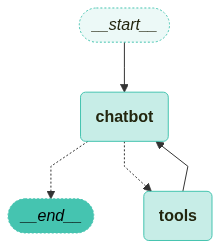

In [62]:
########## 7. 그래프 시각화 ##########
# 그래프 시각화
visualize_graph(graph)


In [63]:
from langchain_teddynote.messages import pretty_print_messages
from langchain_core.runnables import RunnableConfig

# 질문
question = "AI 관련 최신 뉴스를 알려주세요."

# 초기 입력 State 를 정의
input = State(messages=[("user", question)])

# config 설정
config = RunnableConfig(
    recursion_limit=10,  # 최대 10개의 노드까지 방문. 그 이상은 RecursionError 발생
    configurable={"thread_id": "1"},  # 스레드 ID 설정
    tags=["my-rag"],  # Tag
)

for event in graph.stream(
    input=input,
    config=config,
    stream_mode="values",
    interrupt_before=["tools"],  # tools 실행 전 interrupt(tools 노드 실행 전 중단)
):
    for key, value in event.items():
        # key 는 노드 이름
        print(f"\n[{key}]\n")

        # value 는 노드의 출력값
        # print(value)
        pretty_print_messages(value)

        # value 에는 state 가 dict 형태로 저장(values 의 key 값)
        if "messages" in value:
            print(f"메시지 개수: {len(value['messages'])}")



[messages]

================================ Human Message =================================

AI 관련 최신 뉴스를 알려주세요.

[messages]

================================ Human Message =================================

AI 관련 최신 뉴스를 알려주세요.
================================== Ai Message ==================================
Tool Calls:
  search_keyword (call_7gLTs7Z1AL3vYzQszReMFH9D)
 Call ID: call_7gLTs7Z1AL3vYzQszReMFH9D
  Args:
    query: AI 최신 뉴스


In [64]:
# 그래프 상태 스냅샷 생성
snapshot = graph.get_state(config)

# 다음 스냅샷 상태
snapshot.next


('tools',)

In [65]:
from langchain_teddynote.messages import display_message_tree

# 메시지 스냅샷에서 마지막 메시지 추출
existing_message = snapshot.values["messages"][-1]

# 메시지 트리 표시
display_message_tree(existing_message.tool_calls)


    index [0]
        name: "search_keyword"
        args: {"query": "AI 최신 뉴스"}
        id: "call_7gLTs7Z1AL3vYzQszReMFH9D"
        type: "tool_call"


In [66]:
# `None`는 현재 상태에 아무것도 추가하지 않음
events = graph.stream(None, config, stream_mode="values")

# 이벤트 반복 처리
for event in events:
    # 메시지가 이벤트에 포함된 경우
    if "messages" in event:
        # 마지막 메시지의 예쁜 출력
        event["messages"][-1].pretty_print()


================================== Ai Message ==================================
Tool Calls:
  search_keyword (call_7gLTs7Z1AL3vYzQszReMFH9D)
 Call ID: call_7gLTs7Z1AL3vYzQszReMFH9D
  Args:
    query: AI 최신 뉴스
================================= Tool Message =================================
Name: search_keyword

[{"url": "https://news.google.com/rss/articles/CBMiakFVX3lxTE9xNUotVlNTTEQzTnZDMVEwOUdNVTVjQlZVLVdLcFNWd1NuNXJ2a0NsNnFfUDNmTzg2bzQzbTNSRlRNTUc2UU12T2F0c28xaE02Sk5tUWlHZkxXemdGVDlNUnFiQVdkY2xkZ3c?oc=5", "content": "[8월26일] \"AI 챗봇의 '의인화' 없애지 않으면 큰 문제 생길 것\" - AI타임스"}, {"url": "https://news.google.com/rss/articles/CBMiSEFVX3lxTE9ZR3pkUS1CRW95Ykh2ejVQYWo3RHFpU185d09XcmF1OG1VbEdUSE5fLURPSkhLNGtpSzI2M1pRMnVCSURUcFZOSw?oc=5", "content": "독자 AI 파운데이션 모델, 대한민국 AI의 새로운 출발선에서 - SK텔레콤 뉴스룸"}, {"url": "https://news.google.com/rss/articles/CBMiU0FVX3lxTE1NZFUyRnI0MmVrb0Z2ZWZMLUNpR2pKM3RvRG1nNUJkbmFKQmRsTGlocElKeU8wUlR1VzNrVlBZMzVuMGJ0b2p1dlE3cnN6bDJZQ3J3?oc=5", "content": "'폭탄 제조·머스크 암살'에 진지한

In [67]:
to_replay = None

# 상태 기록 가져오기
for state in graph.get_state_history(config):
    # 메시지 수 및 다음 상태 출력
    print("메시지 수: ", len(state.values["messages"]), "다음 노드: ", state.next)
    print("-" * 80)
    # 특정 상태 선택 기준: 채팅 메시지 수
    if len(state.values["messages"]) == 3:
        to_replay = state


메시지 수:  4 다음 노드:  ()
--------------------------------------------------------------------------------
메시지 수:  3 다음 노드:  ('chatbot',)
--------------------------------------------------------------------------------
메시지 수:  2 다음 노드:  ('tools',)
--------------------------------------------------------------------------------
메시지 수:  1 다음 노드:  ('chatbot',)
--------------------------------------------------------------------------------
메시지 수:  0 다음 노드:  ('__start__',)
--------------------------------------------------------------------------------


In [68]:
# 다음 항목의 다음 요소 출력
print(to_replay.next)

# 다음 항목의 설정 정보 출력
print(to_replay.config)


('chatbot',)
{'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f082e27-09f3-63d8-8002-655b5188f527'}}


In [69]:
to_replay.config


{'configurable': {'thread_id': '1',
  'checkpoint_ns': '',
  'checkpoint_id': '1f082e27-09f3-63d8-8002-655b5188f527'}}

In [70]:
# `to_replay.config`는 `checkpoint_id`는 체크포인터에 저장된 상태에 해당
for event in graph.stream(None, to_replay.config, stream_mode="values"):
    # 메시지가 이벤트에 포함된 경우
    if "messages" in event:
        # 마지막 메시지 출력
        event["messages"][-1].pretty_print()


================================= Tool Message =================================
Name: search_keyword

[{"url": "https://news.google.com/rss/articles/CBMiakFVX3lxTE9xNUotVlNTTEQzTnZDMVEwOUdNVTVjQlZVLVdLcFNWd1NuNXJ2a0NsNnFfUDNmTzg2bzQzbTNSRlRNTUc2UU12T2F0c28xaE02Sk5tUWlHZkxXemdGVDlNUnFiQVdkY2xkZ3c?oc=5", "content": "[8월26일] \"AI 챗봇의 '의인화' 없애지 않으면 큰 문제 생길 것\" - AI타임스"}, {"url": "https://news.google.com/rss/articles/CBMiSEFVX3lxTE9ZR3pkUS1CRW95Ykh2ejVQYWo3RHFpU185d09XcmF1OG1VbEdUSE5fLURPSkhLNGtpSzI2M1pRMnVCSURUcFZOSw?oc=5", "content": "독자 AI 파운데이션 모델, 대한민국 AI의 새로운 출발선에서 - SK텔레콤 뉴스룸"}, {"url": "https://news.google.com/rss/articles/CBMiU0FVX3lxTE1NZFUyRnI0MmVrb0Z2ZWZMLUNpR2pKM3RvRG1nNUJkbmFKQmRsTGlocElKeU8wUlR1VzNrVlBZMzVuMGJ0b2p1dlE3cnN6bDJZQ3J3?oc=5", "content": "'폭탄 제조·머스크 암살'에 진지한 답변…AI 그록, 수십만건 대화기록 유출 파장 - 네이트"}, {"url": "https://news.google.com/rss/articles/CBMiakFVX3lxTE9IS09QWmk1MTZPTk1EcXZzMksxMmxfY3dUbXFRUFMtaEl0ZV92UWt0bjZxemNtdUxIQ0ZLWGo3RGoyNXFFajZrY0VXMDdmNTEwQkE0R3ljVnhMQkVZ

07. 중간단계 개입 되돌림을 통한 상태 수정과 Replay

In [71]:
from langchain_core.runnables import RunnableConfig

# 질문
question = "LangGraph 가 무엇인지 조사하여 알려주세요!"

# 초기 입력 상태를 정의
input = State(messages=[("user", question)])

# config 설정
config = RunnableConfig(
    configurable={"thread_id": "1"},  # 스레드 ID 설정
)


In [72]:
# 그래프 채널 목록 출력
list(graph.channels)


['messages',
 '__start__',
 '__pregel_tasks',
 'branch:to:chatbot',
 'branch:to:tools']

In [73]:
# 그래프 스트림 호출
events = graph.stream(
    input=input, config=config, interrupt_before=["tools"], stream_mode="values"
)

# 이벤트 반복 처리
for event in events:
    # 메시지가 이벤트에 포함된 경우
    if "messages" in event:
        # 마지막 메시지의 예쁜 출력
        event["messages"][-1].pretty_print()


================================ Human Message =================================

LangGraph 가 무엇인지 조사하여 알려주세요!
================================== Ai Message ==================================
Tool Calls:
  search_keyword (call_gGjPjxD2ZYmHT4N9El4kFOWf)
 Call ID: call_gGjPjxD2ZYmHT4N9El4kFOWf
  Args:
    query: LangGraph


In [74]:
# 그래프 상태 스냅샷 생성
snapshot = graph.get_state(config)

# 가장 최근 메시지 추출
last_message = snapshot.values["messages"][-1]

# 메시지 출력
last_message.pretty_print()


================================== Ai Message ==================================
Tool Calls:
  search_keyword (call_gGjPjxD2ZYmHT4N9El4kFOWf)
 Call ID: call_gGjPjxD2ZYmHT4N9El4kFOWf
  Args:
    query: LangGraph


In [75]:
modified_search_result = """[수정된 웹 검색 결과] 
LangGraph는 상태 기반의 다중 액터 애플리케이션을 LLM을 활용해 구축할 수 있도록 지원합니다.
LangGraph는 사이클 흐름, 제어 가능성, 지속성, 클라우드 배포 기능을 제공하는 오픈 소스 라이브러리입니다.

자세한 튜토리얼은 [LangGraph 튜토리얼](https://langchain-ai.github.io/langgraph/tutorials/) 과
테디노트의 [랭체인 한국어 튜토리얼](https://wikidocs.net/233785) 을 참고하세요."""

print(modified_search_result)


[수정된 웹 검색 결과] 
LangGraph는 상태 기반의 다중 액터 애플리케이션을 LLM을 활용해 구축할 수 있도록 지원합니다.
LangGraph는 사이클 흐름, 제어 가능성, 지속성, 클라우드 배포 기능을 제공하는 오픈 소스 라이브러리입니다.

자세한 튜토리얼은 [LangGraph 튜토리얼](https://langchain-ai.github.io/langgraph/tutorials/) 과
테디노트의 [랭체인 한국어 튜토리얼](https://wikidocs.net/233785) 을 참고하세요.


In [76]:
# 수정하고자 하는 `ToolMessage` 의 `tool_call_id` 추출
tool_call_id = last_message.tool_calls[0]["id"]
print(tool_call_id)


call_gGjPjxD2ZYmHT4N9El4kFOWf


In [77]:
from langchain_core.messages import AIMessage, ToolMessage

new_messages = [
    # LLM API의 도구 호출과 일치하는 ToolMessage 필요
    ToolMessage(
        content=modified_search_result,
        tool_call_id=tool_call_id,
    ),
    # LLM의 응답에 직접적으로 내용 추가
    # AIMessage(content=modified_search_result),
]

new_messages[-1].pretty_print()


================================= Tool Message =================================

[수정된 웹 검색 결과] 
LangGraph는 상태 기반의 다중 액터 애플리케이션을 LLM을 활용해 구축할 수 있도록 지원합니다.
LangGraph는 사이클 흐름, 제어 가능성, 지속성, 클라우드 배포 기능을 제공하는 오픈 소스 라이브러리입니다.

자세한 튜토리얼은 [LangGraph 튜토리얼](https://langchain-ai.github.io/langgraph/tutorials/) 과
테디노트의 [랭체인 한국어 튜토리얼](https://wikidocs.net/233785) 을 참고하세요.


In [78]:
graph.update_state(
    # 업데이트할 상태 지정
    config,
    # 제공할 업데이트된 값. `State`의 메시지는 "추가 전용"으로 기존 상태에 추가됨
    {"messages": new_messages},
    as_node="tools",
)

print("(최근 1개의 메시지 출력)\n")
print(graph.get_state(config).values["messages"][-1])


(최근 1개의 메시지 출력)

content='[수정된 웹 검색 결과] \nLangGraph는 상태 기반의 다중 액터 애플리케이션을 LLM을 활용해 구축할 수 있도록 지원합니다.\nLangGraph는 사이클 흐름, 제어 가능성, 지속성, 클라우드 배포 기능을 제공하는 오픈 소스 라이브러리입니다.\n\n자세한 튜토리얼은 [LangGraph 튜토리얼](https://langchain-ai.github.io/langgraph/tutorials/) 과\n테디노트의 [랭체인 한국어 튜토리얼](https://wikidocs.net/233785) 을 참고하세요.' id='f446e43b-75e7-419f-8b27-cd34eb19a9f2' tool_call_id='call_gGjPjxD2ZYmHT4N9El4kFOWf'


In [79]:
snapshot = graph.get_state(config)
snapshot.next


('chatbot',)

In [80]:
# `None`는 현재 상태에 아무것도 추가하지 않음
events = graph.stream(None, config, stream_mode="values")

# 이벤트 반복 처리
for event in events:
    # 메시지가 이벤트에 포함된 경우
    if "messages" in event:
        # 마지막 메시지의 예쁜 출력
        event["messages"][-1].pretty_print()


================================= Tool Message =================================

[수정된 웹 검색 결과] 
LangGraph는 상태 기반의 다중 액터 애플리케이션을 LLM을 활용해 구축할 수 있도록 지원합니다.
LangGraph는 사이클 흐름, 제어 가능성, 지속성, 클라우드 배포 기능을 제공하는 오픈 소스 라이브러리입니다.

자세한 튜토리얼은 [LangGraph 튜토리얼](https://langchain-ai.github.io/langgraph/tutorials/) 과
테디노트의 [랭체인 한국어 튜토리얼](https://wikidocs.net/233785) 을 참고하세요.
================================== Ai Message ==================================

LangGraph는 상태 기반(State-based)의 다중 액터(multi-actor) 애플리케이션을 대형 언어모델(LLM, 예: GPT-4 등)을 활용해서 쉽고 효율적으로 구축할 수 있게 해주는 오픈소스 라이브러리입니다.

주요 특징:

- 사이클 흐름(Cyclic flow): 단방향·단순 논리가 아닌, 복잡하게 순환하거나 분기되는 플로우도 설계할 수 있습니다.
- 제어 가능성: 애플리케이션의 상태(state)나 흐름을 세밀하게 통제할 수 있습니다.
- 지속성(Persistence): 처리 중인 데이터나 상태 정보를 저장해 중단 후 재실행이 가능합니다.
- 클라우드 배포: 서버리스 환경 등에서 클라우드로 손쉽게 배포할 수 있습니다.

LangGraph는 주로 대화형 AI, 워크플로우 오케스트레이션, 멀티 에이전트 시스템 등 복잡한 LLM 기반 서비스 개발에 폭넓게 사용됩니다.

더 자세한 정보와 실습은 다음 자료를 참고하세요:  
- 공식 LangGraph 튜토리얼: https://langchain-ai.github.io/langgraph/tutorials/  
- 한국어 튜토

In [81]:
# 이 함수가 작동할 노드 지정. 이 노드가 방금 실행된 것처럼 자동으로 처리 계속
# graph.update_state(
#     config,
#     {
#         "messages": [
#             AIMessage(content="마지막으로 최종 메시지를 추가하여 마무리 합니다.")
#         ]
#     },
#     as_node="chatbot",
# )


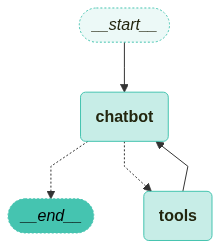

In [82]:
from langchain_teddynote.graphs import visualize_graph

visualize_graph(graph)


In [83]:
# 그래프 상태 스냅샷 생성
snapshot = graph.get_state(config)

# 최근 세 개의 메시지 출력
for message in snapshot.values["messages"]:
    message.pretty_print()


================================ Human Message =================================

AI 관련 최신 뉴스를 알려주세요.
================================== Ai Message ==================================
Tool Calls:
  search_keyword (call_7gLTs7Z1AL3vYzQszReMFH9D)
 Call ID: call_7gLTs7Z1AL3vYzQszReMFH9D
  Args:
    query: AI 최신 뉴스
================================= Tool Message =================================
Name: search_keyword

[{"url": "https://news.google.com/rss/articles/CBMiakFVX3lxTE9xNUotVlNTTEQzTnZDMVEwOUdNVTVjQlZVLVdLcFNWd1NuNXJ2a0NsNnFfUDNmTzg2bzQzbTNSRlRNTUc2UU12T2F0c28xaE02Sk5tUWlHZkxXemdGVDlNUnFiQVdkY2xkZ3c?oc=5", "content": "[8월26일] \"AI 챗봇의 '의인화' 없애지 않으면 큰 문제 생길 것\" - AI타임스"}, {"url": "https://news.google.com/rss/articles/CBMiSEFVX3lxTE9ZR3pkUS1CRW95Ykh2ejVQYWo3RHFpU185d09XcmF1OG1VbEdUSE5fLURPSkhLNGtpSzI2M1pRMnVCSURUcFZOSw?oc=5", "content": "독자 AI 파운데이션 모델, 대한민국 AI의 새로운 출발선에서 - SK텔레콤 뉴스룸"}, {"url": "https://news.google.com/rss/articles/CBMiU0FVX3lxTE1NZFUyRnI0MmVrb0Z2ZWZMLUNpR2pKM3RvRG1nN

In [84]:
# 다음 상태 출력
print(snapshot.next)


()


In [85]:
from langchain_teddynote.graphs import generate_random_hash

thread_id = generate_random_hash()
print(f"thread_id: {thread_id}")

question = "LangGraph 에 대해서 배워보고 싶습니다. 유용한 자료를 추천해 주세요!"

# 초기 입력 상태를 정의
input = State(messages=[("user", question)])

# 새로운 config 생성
config = {"configurable": {"thread_id": thread_id}}

events = graph.stream(
    input=input,
    config=config,
    interrupt_before=["tools"],
    stream_mode="values",
)
for event in events:
    if "messages" in event:
        event["messages"][-1].pretty_print()


thread_id: 30104c
================================ Human Message =================================

LangGraph 에 대해서 배워보고 싶습니다. 유용한 자료를 추천해 주세요!
================================== Ai Message ==================================
Tool Calls:
  search_keyword (call_bguTstuecuRcKLaS1QaUTcaG)
 Call ID: call_bguTstuecuRcKLaS1QaUTcaG
  Args:
    query: LangGraph


In [86]:
# config 를 복사
config_copy = config.copy()


In [87]:
from langchain_core.messages import AIMessage

# 스냅샷 상태 가져오기
snapshot = graph.get_state(config)

# messages 의 마지막 메시지 가져오기
existing_message = snapshot.values["messages"][-1]

# 메시지 ID 출력
print("Message ID", existing_message.id)


Message ID run--1e776437-ca8b-4d7d-aad0-d63c7c735517-0


In [88]:
# 첫 번째 도구 호출 출력
print(existing_message.tool_calls[0])


{'name': 'search_keyword', 'args': {'query': 'LangGraph'}, 'id': 'call_bguTstuecuRcKLaS1QaUTcaG', 'type': 'tool_call'}


In [89]:
# tool_calls 를 복사하여 새로운 도구 호출 생성
new_tool_call = existing_message.tool_calls[0].copy()

# 쿼리 매개변수 업데이트(갱신)
new_tool_call["args"] = {"query": "LangGraph site:teddylee777.github.io"}
new_tool_call


{'name': 'search_keyword',
 'args': {'query': 'LangGraph site:teddylee777.github.io'},
 'id': 'call_bguTstuecuRcKLaS1QaUTcaG',
 'type': 'tool_call'}

In [90]:
# AIMessage 생성
new_message = AIMessage(
    content=existing_message.content,
    tool_calls=[new_tool_call],
    # 중요! ID는 메시지를 상태에 추가하는 대신 교체하는 방법
    id=existing_message.id,
)

print(new_message.id)

# 수정한 메시지 출력
new_message.pretty_print()


run--1e776437-ca8b-4d7d-aad0-d63c7c735517-0
================================== Ai Message ==================================
Tool Calls:
  search_keyword (call_bguTstuecuRcKLaS1QaUTcaG)
 Call ID: call_bguTstuecuRcKLaS1QaUTcaG
  Args:
    query: LangGraph site:teddylee777.github.io


In [91]:
# 업데이트된 도구 호출 출력
print(new_message.tool_calls[0])

# 메시지 ID 출력
print("\nMessage ID", new_message.id)

# 상태 업데이트
graph.update_state(config, {"messages": [new_message]})


{'name': 'search_keyword', 'args': {'query': 'LangGraph site:teddylee777.github.io'}, 'id': 'call_bguTstuecuRcKLaS1QaUTcaG', 'type': 'tool_call'}

Message ID run--1e776437-ca8b-4d7d-aad0-d63c7c735517-0


{'configurable': {'thread_id': '30104c',
  'checkpoint_ns': '',
  'checkpoint_id': '1f082e3c-83f2-6264-8002-233b6be4a69f'}}

In [92]:
# 마지막 메시지의 도구 호출 가져오기
graph.get_state(config).values["messages"][-1].tool_calls


[{'name': 'search_keyword',
  'args': {'query': 'LangGraph site:teddylee777.github.io'},
  'id': 'call_bguTstuecuRcKLaS1QaUTcaG',
  'type': 'tool_call'}]

In [93]:
# 그래프 스트림에서 이벤트 수신
events = graph.stream(None, config, stream_mode="values")

# 각 이벤트에 대한 처리
for event in events:
    # 메시지가 있는 경우 마지막 메시지 출력
    if "messages" in event:
        event["messages"][-1].pretty_print()


================================== Ai Message ==================================
Tool Calls:
  search_keyword (call_bguTstuecuRcKLaS1QaUTcaG)
 Call ID: call_bguTstuecuRcKLaS1QaUTcaG
  Args:
    query: LangGraph site:teddylee777.github.io
================================= Tool Message =================================
Name: search_keyword

[{"url": "https://news.google.com/rss/articles/CBMiREFVX3lxTE9YdjI3SVhReEpSc2ctaUl1ZzBpb2hFbUxpRnFacGtCRHdROEoyNjlVVkZJS09RdnlqSml6U2d0RGk4a1JG?oc=5", "content": "테디노트 - GitHub"}, {"url": "https://news.google.com/rss/articles/CBMib0FVX3lxTE9iTXZZTlNoMEw1QnVvXzJZUTRyT19CanNUbUZicUVqNGtIdWFTSnprb2VoYU9oRUZGVDNRTVhsa2RIT2xBVnVVUXY4SXJtWXpJVW1fZ2xUQ1g2VWZqQnFyMklXc3FiYzJDb056eTM2NA?oc=5", "content": "LangGraph Retrieval Agent를 활용한 동적 문서 검색 및 처리 - GitHub"}, {"url": "https://news.google.com/rss/articles/CBMiU0FVX3lxTE9FeFU1cTktMmJlNFBxOWxLSDVCRE4wemx3c2R2OWpKYlVEdnZwSUwtSXpRRDBWTGtTSklZNXk2alNjZHF3TnVoS29VdWtuN3BBcFZz?oc=5", "content": "카테고리 - GitHub"}, {"u

In [94]:
# 이벤트 스트림 생성
events = graph.stream(
    {
        "messages": (
            "user",
            "내가 지금까지 배운 내용에 대해서 매우 친절하고 정성스럽게 한국어로 답변해줘! 출처를 반드시 포함해줘!",
        )
    },
    config,
    stream_mode="values",
)

# 메시지 이벤트 처리
for event in events:
    if "messages" in event:
        # 마지막 메시지 출력
        event["messages"][-1].pretty_print()


================================ Human Message =================================

내가 지금까지 배운 내용에 대해서 매우 친절하고 정성스럽게 한국어로 답변해줘! 출처를 반드시 포함해줘!
================================== Ai Message ==================================

물론입니다! 아래는 LangGraph에 대해 정리한 내용과 함께 추천드린 자료의 출처를 포함한 안내입니다.

---

LangGraph란 무엇인가요?  
LangGraph는 주로 자연어 처리(NLP)를 위한 다양한 그래프 기반의 구조와 에이전트(Agent) 시스템을 만들어주는 도구입니다. 특히, 대규모 언어 모델(LLM)과 결합하여 복잡한 문서 검색, 분류, 요약 등의 작업을 효율적으로 처리할 수 있습니다. LangGraph를 이용하면 여러 단계로 이루어진 문서 처리 파이프라인을 쉽게 구축할 수 있습니다.

LangGraph의 주요 특징

- 대화형 AI, 챗봇, 문서 요약, 텍스트 분류 등 다양한 자연어 처리 작업에서 활용됩니다.
- 여러 Agent나 Node(노드)들의 그래프 구조를 자유롭게 설계할 수 있어 복잡한 워크플로우에 적합합니다.
- 실제 업무에서는 동적으로 문서를 검색하거나, AI 모델이 필요에 따라 다양한 작업을 순차적으로 처리할 수 있도록 도와줍니다.

어디에 활용될 수 있나요?

예를 들어, 대용량의 문서를 검색하고 그 내용을 요약해주는 시스템, 또는 사용자의 질문에 대해 다양한 출처를 탐색하여 최적의 답변을 제공하는 챗봇 등에 적용할 수 있습니다.  
실제 예시로는 LangGraph Retrieval Agent를 이용해 새로운 문서를 동적으로 검색하고, 필요한 정보만 뽑아내는 응용 프로그램을 만들 수 있습니다.

추천드린 자료 및 학습 경로

1. [LangGraph Retrieval Agent를 활용한 동적 문서 검색 및 처리 - GitHub](h

In [95]:
graph.get_state(config).values["messages"][-1].pretty_print()


================================== Ai Message ==================================

물론입니다! 아래는 LangGraph에 대해 정리한 내용과 함께 추천드린 자료의 출처를 포함한 안내입니다.

---

LangGraph란 무엇인가요?  
LangGraph는 주로 자연어 처리(NLP)를 위한 다양한 그래프 기반의 구조와 에이전트(Agent) 시스템을 만들어주는 도구입니다. 특히, 대규모 언어 모델(LLM)과 결합하여 복잡한 문서 검색, 분류, 요약 등의 작업을 효율적으로 처리할 수 있습니다. LangGraph를 이용하면 여러 단계로 이루어진 문서 처리 파이프라인을 쉽게 구축할 수 있습니다.

LangGraph의 주요 특징

- 대화형 AI, 챗봇, 문서 요약, 텍스트 분류 등 다양한 자연어 처리 작업에서 활용됩니다.
- 여러 Agent나 Node(노드)들의 그래프 구조를 자유롭게 설계할 수 있어 복잡한 워크플로우에 적합합니다.
- 실제 업무에서는 동적으로 문서를 검색하거나, AI 모델이 필요에 따라 다양한 작업을 순차적으로 처리할 수 있도록 도와줍니다.

어디에 활용될 수 있나요?

예를 들어, 대용량의 문서를 검색하고 그 내용을 요약해주는 시스템, 또는 사용자의 질문에 대해 다양한 출처를 탐색하여 최적의 답변을 제공하는 챗봇 등에 적용할 수 있습니다.  
실제 예시로는 LangGraph Retrieval Agent를 이용해 새로운 문서를 동적으로 검색하고, 필요한 정보만 뽑아내는 응용 프로그램을 만들 수 있습니다.

추천드린 자료 및 학습 경로

1. [LangGraph Retrieval Agent를 활용한 동적 문서 검색 및 처리 - GitHub](https://news.google.com/rss/articles/CBMib0FVX3lxTE9iTXZZTlNoMEw1QnVvXzJZUTRyT19CanNUbUZicUVqNGtIdWFTSnprb2VoYU9oRUZGVDNRTVhsa2RIT2xBVnVVUXY4

In [96]:
to_replay_state = None

# 상태 기록 가져오기
for state in graph.get_state_history(config):

    messages = state.values["messages"]

    if len(messages) > 0:
        print(state.values["messages"][-1].id)
        # 메시지 수 및 다음 상태 출력
        print("메시지 수: ", len(state.values["messages"]), "다음 노드: ", state.next)
        print("-" * 80)
        # 특정 상태 선택 기준: 채팅 메시지 수
        if len(state.values["messages"]) == 2:
            # 특정 메시지 ID 선택
            to_replay_state = state


run--714c6785-b20b-4a03-9869-a53bce720851-0
메시지 수:  6 다음 노드:  ()
--------------------------------------------------------------------------------
42cf9692-c509-4552-be58-3a191e58909d
메시지 수:  5 다음 노드:  ('chatbot',)
--------------------------------------------------------------------------------
run--f81a6bb2-7e8f-458c-b017-9007b89d0c0f-0
메시지 수:  4 다음 노드:  ('__start__',)
--------------------------------------------------------------------------------
run--f81a6bb2-7e8f-458c-b017-9007b89d0c0f-0
메시지 수:  4 다음 노드:  ()
--------------------------------------------------------------------------------
5d051438-5759-4b2f-a799-02ccaf5677b8
메시지 수:  3 다음 노드:  ('chatbot',)
--------------------------------------------------------------------------------
run--1e776437-ca8b-4d7d-aad0-d63c7c735517-0
메시지 수:  2 다음 노드:  ('tools',)
--------------------------------------------------------------------------------
run--1e776437-ca8b-4d7d-aad0-d63c7c735517-0
메시지 수:  2 다음 노드:  ('tools',)
-------------------------

In [97]:
from langchain_teddynote.messages import display_message_tree

# 선택한 메시지 가져오기
existing_message = to_replay_state.values["messages"][-1]

# 메시지 트리 출력
display_message_tree(existing_message)


    content: ""
    additional_kwargs:
        tool_calls:
            index [0]
                id: "call_bguTstuecuRcKLaS1QaUTcaG"
                function: {"arguments": "{"query":"LangGraph"}", "name": "search_keyword"}
                type: "function"
        refusal: None
    response_metadata:
        token_usage:
            completion_tokens: 15
            prompt_tokens: 62
            total_tokens: 77
            completion_tokens_details: {"accepted_prediction_tokens": 0, "audio_tokens": 0, "reasoning_tokens": 0, "rejected_prediction_tokens": 0}
            prompt_tokens_details: {"audio_tokens": 0, "cached_tokens": 0}
        model_name: "gpt-4.1-2025-04-14"
        system_fingerprint: "fp_daf5fcc80a"
        id: "chatcmpl-C8z5AsXQGyzdd6ZyrIo4ADqJQWxE7"
        service_tier: "default"
        finish_reason: "tool_calls"
        logprobs: None
    type: "ai"
    name: None
    id: "run--1e776437-ca8b-4d7d-aad0-d63c7c735517-0"
    example: False
    tool_calls:
        index

In [98]:
tool_call = existing_message.tool_calls[0].copy()
tool_call["args"] = {"query": "LangGraph human-in-the-loop workflow site:reddit.com"}
tool_call


{'name': 'search_keyword',
 'args': {'query': 'LangGraph human-in-the-loop workflow site:reddit.com'},
 'id': 'call_bguTstuecuRcKLaS1QaUTcaG',
 'type': 'tool_call'}

In [99]:
# AIMessage 생성
new_message = AIMessage(
    content=existing_message.content,
    tool_calls=[tool_call],
    # 중요! ID는 메시지를 상태에 추가하는 대신 교체하는 방법
    id=existing_message.id,
)

# 수정한 메시지 출력
new_message.tool_calls[0]["args"]


{'query': 'LangGraph human-in-the-loop workflow site:reddit.com'}

In [100]:
# 업데이트 전 메시지 확인
graph.get_state(to_replay_state.config).values["messages"][-1].tool_calls


[{'name': 'search_keyword',
  'args': {'query': 'LangGraph'},
  'id': 'call_bguTstuecuRcKLaS1QaUTcaG',
  'type': 'tool_call'}]

In [101]:
# 상태 업데이트
updated_state = graph.update_state(
    to_replay_state.config,
    {"messages": [new_message]},
)
updated_state


{'configurable': {'thread_id': '30104c',
  'checkpoint_ns': '',
  'checkpoint_id': '1f082e41-a7b1-6fba-8002-1c782b6680a2'}}

In [102]:
# config 에는 updated_state 를 전달합니다. 이는 임의로 갱신한 상태를 전달하는 것입니다.
for event in graph.stream(None, updated_state, stream_mode="values"):
    # 메시지가 이벤트에 포함된 경우
    if "messages" in event:
        # 마지막 메시지 출력
        event["messages"][-1].pretty_print()


================================== Ai Message ==================================
Tool Calls:
  search_keyword (call_bguTstuecuRcKLaS1QaUTcaG)
 Call ID: call_bguTstuecuRcKLaS1QaUTcaG
  Args:
    query: LangGraph human-in-the-loop workflow site:reddit.com
================================= Tool Message =================================
Name: search_keyword

[{"url": "https://news.google.com/rss/articles/CBMipgFBVV95cUxOeGZDOFo2bGZfWlBMclVtdXBLN21udlVNUWNwWlQyeHl2TktGYUc3b0U2UDQxeGR4b1FiV2dVZ1hPNmxYSDFuM1Y3dy0tS1g5WWl5RVQwLUc0MHJoMUR6M0VheU1LNDlwWHp4SGVCa3VPMFdhVUhVanB0Y05mWGRwcUJwVnAzUHhndVRXV3VYWDNsdVRaa3YwcmloajNWOTVLQ3JsS3N3?oc=5", "content": "왜 모든 로컬 AI 모델이 이렇게 나쁠까? 아무도 이런 얘기를 안 해! - Reddit"}, {"url": "https://news.google.com/rss/articles/CBMiqwFBVV95cUxPUkQwakNnNWkzMHFNWWxCVlZpdjNRUWlIbFYzam1OckJWZnlETzZrdDVMUmRtdXc2M0NSX2VCbGItcWZRTHA4azFub3kzQnpuT3JWVzM5OW5LQTU1SlF4SjhDWXNTUzR2cFVnR01paHo3Z3hldE4wRDBqZlVfX3dkakhCZ21nUjJESTZOM3V6YWs5QjFrNVV0YTZGUXA2YW1Lb0kteC1mMGJDSFk?oc=5", "conten

In [103]:
# 최종 결과 출력
for msg in graph.get_state(config).values["messages"]:
    msg.pretty_print()


================================ Human Message =================================

LangGraph 에 대해서 배워보고 싶습니다. 유용한 자료를 추천해 주세요!
================================== Ai Message ==================================
Tool Calls:
  search_keyword (call_bguTstuecuRcKLaS1QaUTcaG)
 Call ID: call_bguTstuecuRcKLaS1QaUTcaG
  Args:
    query: LangGraph human-in-the-loop workflow site:reddit.com
================================= Tool Message =================================
Name: search_keyword

[{"url": "https://news.google.com/rss/articles/CBMipgFBVV95cUxOeGZDOFo2bGZfWlBMclVtdXBLN21udlVNUWNwWlQyeHl2TktGYUc3b0U2UDQxeGR4b1FiV2dVZ1hPNmxYSDFuM1Y3dy0tS1g5WWl5RVQwLUc0MHJoMUR6M0VheU1LNDlwWHp4SGVCa3VPMFdhVUhVanB0Y05mWGRwcUJwVnAzUHhndVRXV3VYWDNsdVRaa3YwcmloajNWOTVLQ3JsS3N3?oc=5", "content": "왜 모든 로컬 AI 모델이 이렇게 나쁠까? 아무도 이런 얘기를 안 해! - Reddit"}, {"url": "https://news.google.com/rss/articles/CBMiqwFBVV95cUxPUkQwakNnNWkzMHFNWWxCVlZpdjNRUWlIbFYzam1OckJWZnlETzZrdDVMUmRtdXc2M0NSX2VCbGItcWZRTHA4azFub3kzQnpuT3JWVzM5OW5L